/tmp/ipython-input-3206131199.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


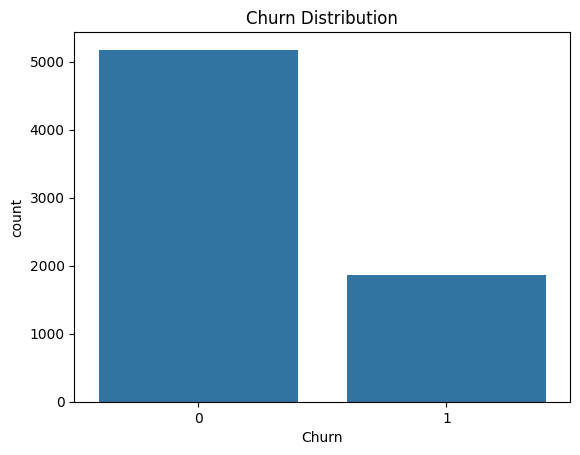

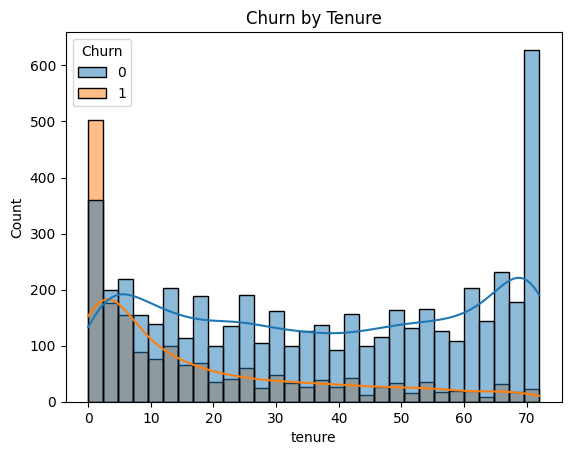

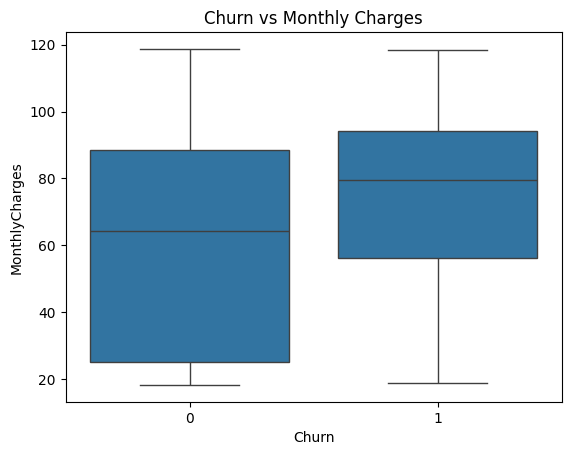

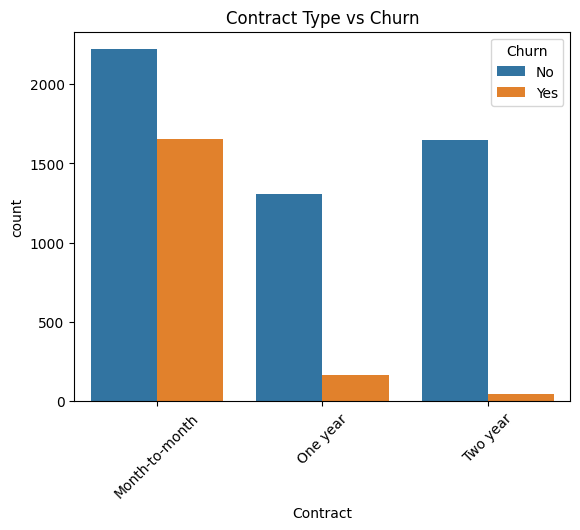

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:
Accuracy: 0.8034066713981547
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409

Random Forest Results:
Accuracy: 0.7899219304471257
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

XGBoost Results:
Accuracy: 0.7892122072391767
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.62      0.54      0.58       374

    accuracy              

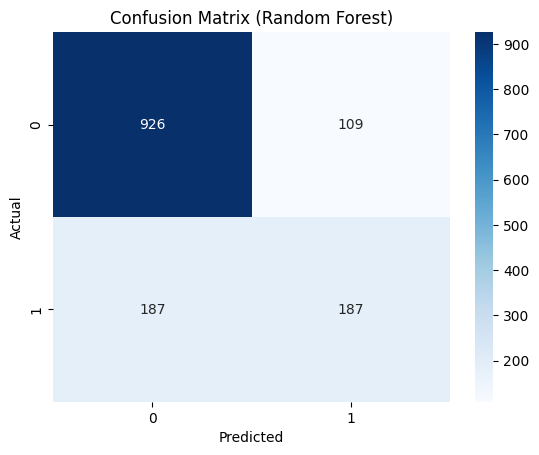

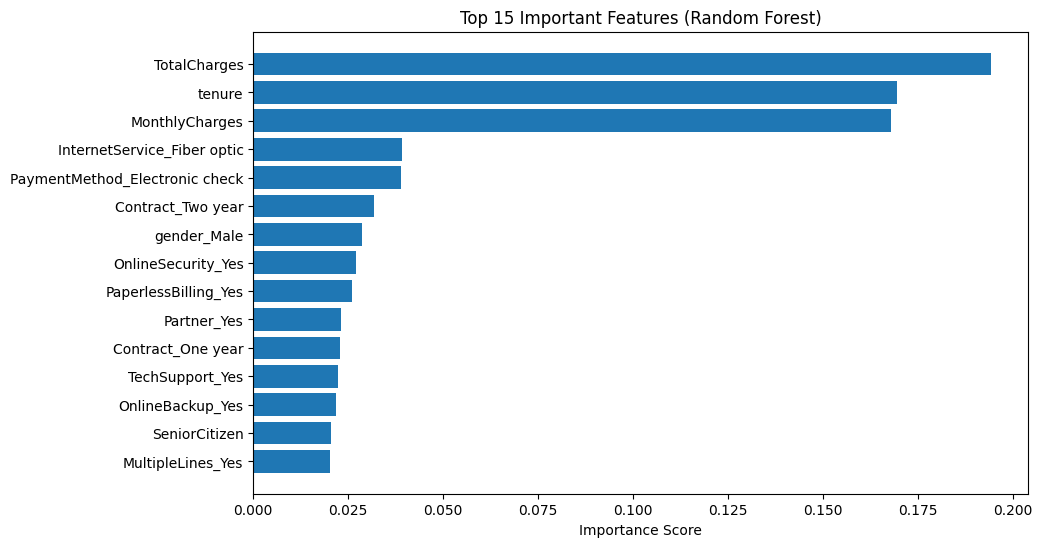

<Figure size 1000x800 with 0 Axes>

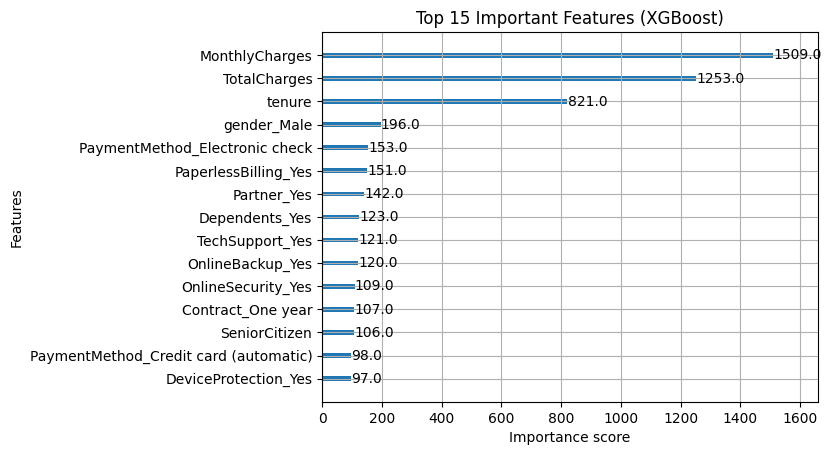

Models saved!

--- BUSINESS INSIGHTS FROM FEATURE IMPORTANCE ---

1️⃣ Long-term customers churn far less — tenure is a major protective factor.
2️⃣ Month-to-month contract customers churn the most.
3️⃣ High monthly charges strongly increase churn likelihood.
4️⃣ Fiber optic internet customers have higher churn risk vs DSL.
5️⃣ Lack of additional services (Online Security, Tech Support) raises churn rate.
6️⃣ Electronic check payment method is strongly associated with churn.
7️⃣ Senior citizens churn more, but effect size is smaller than billing factors.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load RAW dataset (for EDA)
df_raw = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Load CLEAN dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# --- CLEANING ---
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.drop('customerID', axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)

# --- EDA VISUALIZATION USING CLEANED DF ---
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30)
plt.title("Churn by Tenure")
plt.show()

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Churn vs Monthly Charges")
plt.show()

# --- CONTRACT TYPE VISUALIZATION FROM RAW DATA ---
sns.countplot(x='Contract', hue='Churn', data=df_raw)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=45)
plt.show()

from sklearn.model_selection import train_test_split

# X = all features except churn
X = df.drop('Churn', axis=1)

# y = target
y = df['Churn']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

!pip install xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    learning_rate=0.1,
    n_estimators=250,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)   # change model here if needed

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
idx = np.argsort(importances)[-15:]  # top 15 features

plt.figure(figsize=(10, 6))
plt.barh(np.array(X.columns)[idx], importances[idx])
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

from xgboost import plot_importance

plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=15)
plt.title("Top 15 Important Features (XGBoost)")
plt.show()

import joblib

joblib.dump(xgb_model, "churn_model_xgb.pkl")
joblib.dump(rf_model, "churn_model_rf.pkl")
joblib.dump(log_model, "churn_model_logreg.pkl")

print("Models saved!")

print("\n--- BUSINESS INSIGHTS FROM FEATURE IMPORTANCE ---\n")

print("1️⃣ Long-term customers churn far less — tenure is a major protective factor.")
print("2️⃣ Month-to-month contract customers churn the most.")
print("3️⃣ High monthly charges strongly increase churn likelihood.")
print("4️⃣ Fiber optic internet customers have higher churn risk vs DSL.")
print("5️⃣ Lack of additional services (Online Security, Tech Support) raises churn rate.")
print("6️⃣ Electronic check payment method is strongly associated with churn.")
print("7️⃣ Senior citizens churn more, but effect size is smaller than billing factors.")

